In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
from google.colab import files
uploaded = files.upload()

Saving mnist_train.csv to mnist_train.csv


In [0]:
import io
df = pd.read_csv(io.StringIO(uploaded['mnist_train.csv'].decode('utf-8')))


In [9]:
l = df['label']
l.shape

(42000,)

In [10]:
df.shape

(42000, 785)

In [11]:
df = df.drop('label',axis = 1)
df.shape

(42000, 784)

In [12]:
data = df.head(15000)
label = l.head(15000)
print(data.shape,label.shape)

(15000, 784) (15000,)


In [0]:
from sklearn.preprocessing import StandardScaler as Ss

In [14]:
standardised_data = Ss().fit_transform(data)
standardised_data.shape

(15000, 784)

In [15]:
from sklearn.manifold import TSNE
import time

time_start = time.time()
algo = TSNE(n_components=2,random_state = 0,n_iter = 2000)
#default 
    # perplexity ie number of nearest neighbours = 30 by default
    # learning_rate=200.0, 
tsne_data = algo.fit_transform(standardised_data)
time_end = time.time()
print('t-SNE Completed. Total time it took: {} seconds'.format(time_end-time_start))

t-SNE Completed. Total time it took: 1223.7662279605865 seconds


In [17]:
t_d = tsne_data
t_d.shape

(15000, 2)

In [18]:
tsne_data = np.vstack((tsne_data.T,label)).T
tsne_data.shape

(15000, 3)

In [0]:
tsne_df = pd.DataFrame(data = tsne_data , columns=("Dim1","Dim2","label"))

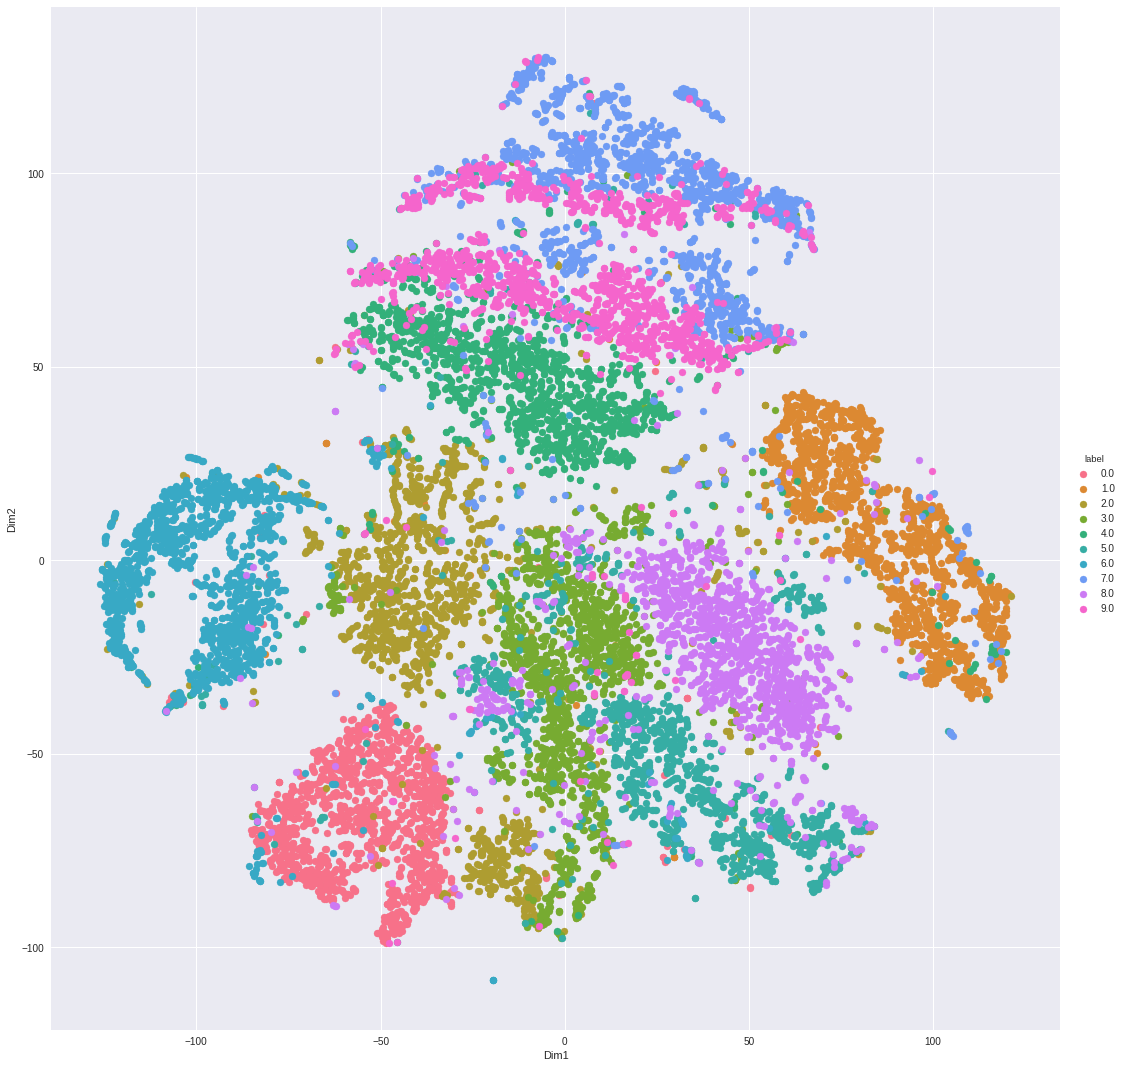

In [20]:
import seaborn as sn
sn.FacetGrid(data = tsne_df , hue = 'label',size = 15).map(plt.scatter,"Dim1","Dim2").add_legend()
plt.show()

In [21]:
#lets try on 42k points
df.shape


(42000, 784)

In [23]:
df_42k = df
l_42k = l
print(df_42k.shape,l_42k.shape)

(42000, 784) (42000,)


In [0]:
stand_data = Ss().fit_transform(df_42k)

In [25]:
stand_data.shape

(42000, 784)

In [26]:

time_start = time.time()
algo = TSNE(n_components=2,random_state = 0,n_iter = 2000)
#default 
    # perplexity ie number of nearest neighbours = 30 by default
    # learning_rate=200.0, 
tsne_d_42k = algo.fit_transform(stand_data)
time_end = time.time()
print('t-SNE of 42k points Completed. Total time it took: {} seconds'.format(time_end-time_start))

t-SNE of 42k points Completed. Total time it took: 6031.071412801743 seconds


In [0]:
td_42k = tsne_d_42k

In [28]:
td_42k.shape

(42000, 2)

In [31]:
tsne_data_42 = np.vstack((td_42k.T,l_42k)).T
tsne_data_42.shape

(42000, 3)

In [0]:
tsne_df_42k = pd.DataFrame(data = tsne_data_42 , columns=("Dim1","Dim2","label"))

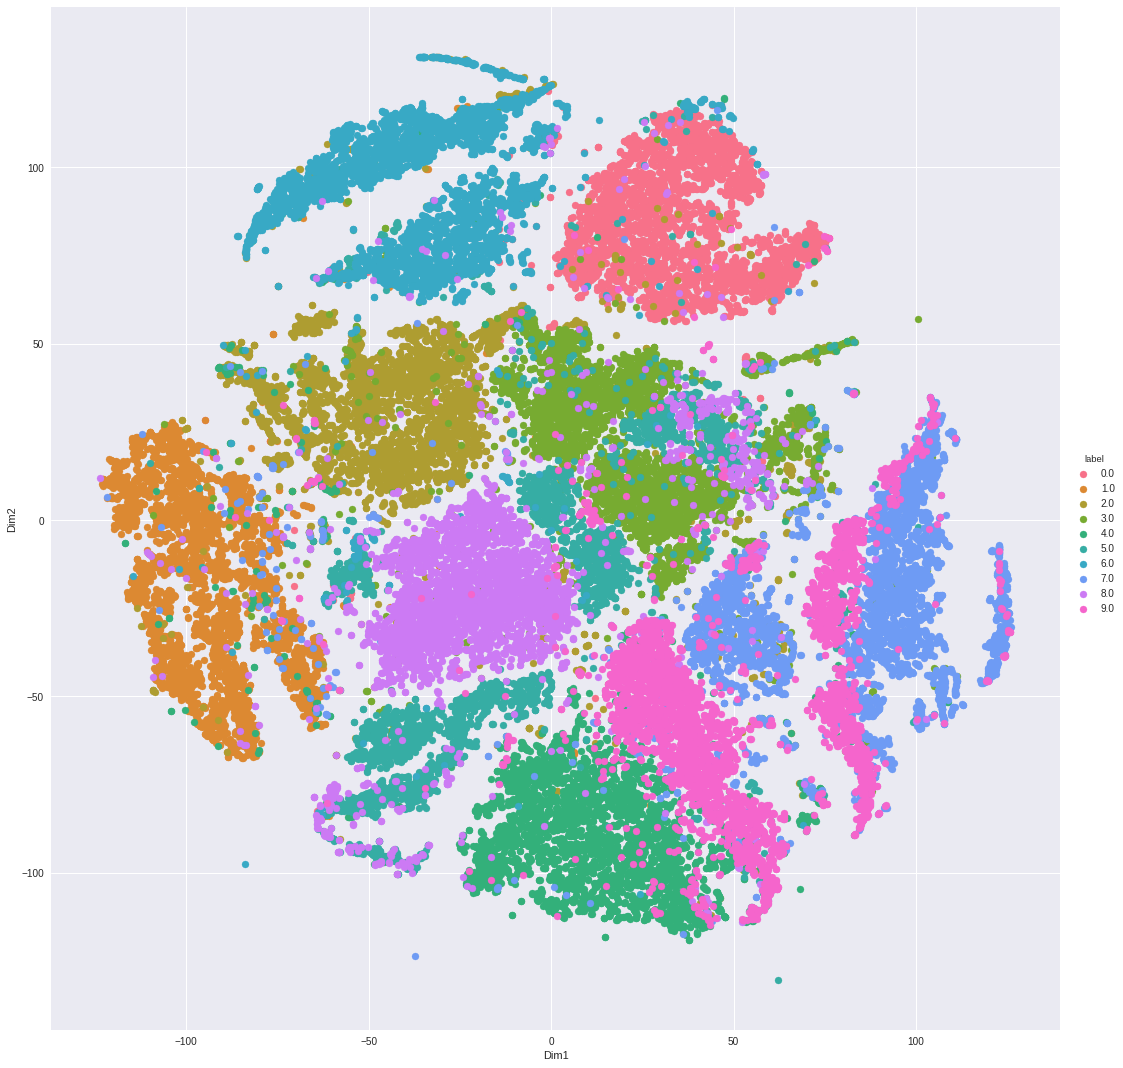

In [33]:
sn.FacetGrid(data = tsne_df_42k , hue = 'label',size = 15).map(plt.scatter,"Dim1","Dim2").add_legend()
plt.show()